In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pwd
%cd yolov5

!ls

[Errno 2] No such file or directory: 'yolov5'
/Users/sathya/Desktop/Learning/yolov5
CITATION.cff          classify              pyproject.toml
CONTRIBUTING.md       data                  requirements.txt
LICENSE               dataloader_test.ipynb segment
Mask_generation.ipynb detect.py             train.py
README.md             export.py             tutorial.ipynb
README.zh-CN.md       hubconf.py            utils
benchmarks.py         models                val.py


/Users/sathya/opt/anaconda3/envs/YOLOV5/lib/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [3]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-390-g0fcb7f57 Python-3.11.10 torch-2.2.2 CPU


Setup complete ✅ (8 CPUs, 16.0 GB RAM, 480.0/926.4 GB disk)


In [64]:
from utils.dataloaders import LoadImagesAndLabels

dataset = LoadImagesAndLabels('/Users/sathya/Desktop/Learning/datasets/coco')



Scanning /Users/sathya/Desktop/Learning/datasets/coco/labels/val2017.cache... 49


In [5]:
dataset.cache_version

0.7

In [44]:
dataset.im_files[0]

'/Users/sathya/Desktop/Learning/datasets/coco/images/val2017/000000000139.jpg'

In [45]:
dataset.label_files[0]

'/Users/sathya/Desktop/Learning/datasets/coco/labels/val2017/000000000139.txt'

In [46]:
dataset.mask_files[0]

'/Users/sathya/Desktop/Learning/datasets/coco/images/mask/000000000139_mask.png'

In [ ]:
dataset.load_image(0)

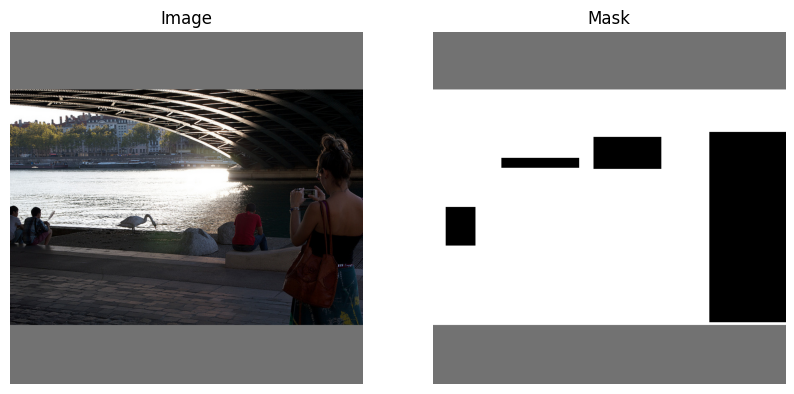

In [67]:
import torch
import matplotlib.pyplot as plt

# Assuming the function returns the following
img_tensor, mask_tensor, labels_out, file_name, shapes = dataset[10]

# Convert tensors to numpy arrays for visualization
img = img_tensor.numpy()
mask = mask_tensor.numpy()

# Check if the image is grayscale or RGB
if img.ndim == 3:  # RGB image
    img = img.transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)

# Check if the image is grayscale or RGB
if mask.ndim == 3:  # RGB image
    mask = mask.transpose(1, 2, 0)

# Display the image and mask
plt.figure(figsize=(10, 5))

# Show the image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
plt.title("Image")
plt.axis('off')

# Show the mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray' if img.ndim == 2 else None)  # Assuming mask is grayscale
plt.title("Mask")
plt.axis('off')

plt.show()


In [59]:
len(dataset[10])

5

In [63]:
dataset[101][0]

tensor([[[114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         ...,
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114]],

        [[114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         ...,
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114]],

        [[114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         ...,
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114]]], dtype=torch.uint8)

In [60]:
dataset[1][4]

((640, 586), ((1.0, 1.0), (27.0, 0.0)))

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, trust_repo=True)  # or yolov5n - yolov5x6 or custom
im = 'yolov5/data/images/bus.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print() 

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images